# Arabic Alphabet Sign Language Classification

## Data preprocessing

In [1]:
from PIL import Image
import os
import numpy as np

imageSize = 224
dataset_path = "/Users/albandariabdulaziz/Desktop/RGB ArSL dataset"

#load and resize the images
def load_data(dataset_path):
    X = []
    y = []
    imageNum = 0
    
    for folderName in os.listdir(dataset_path):
            label = folderName
            for image_filename in os.listdir(os.path.join(dataset_path, folderName)):
                img_path = os.path.join(dataset_path, folderName, image_filename)
                try:
                    with Image.open(img_path) as img:
                        img = img.resize((imageSize, imageSize))
                        img_arr = np.asarray(img)
                        X.append(img_arr)
                        y.append(label)
                    imageNum = imageNum+1
                    print(f"image,{imageNum}, done")
                except OSError as e:
                    print(f"Error processing image {img_path}: {e}")
    
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X, y

X, y = load_data(dataset_path)

image,1, done
image,2, done
image,3, done
image,4, done
image,5, done
image,6, done
image,7, done
image,8, done
image,9, done
image,10, done
image,11, done
image,12, done
image,13, done
image,14, done
image,15, done
image,16, done
image,17, done
image,18, done
image,19, done
image,20, done
image,21, done
image,22, done
image,23, done
image,24, done
image,25, done
image,26, done
image,27, done
image,28, done
image,29, done
image,30, done
image,31, done
image,32, done
image,33, done
image,34, done
image,35, done
image,36, done
image,37, done
image,38, done
image,39, done
image,40, done
image,41, done
image,42, done
image,43, done
image,44, done
image,45, done
image,46, done
image,47, done
image,48, done
image,49, done
image,50, done
image,51, done
image,52, done
image,53, done
image,54, done
image,55, done
image,56, done
image,57, done
image,58, done
image,59, done
image,60, done
image,61, done
image,62, done
image,63, done
image,64, done
image,65, done
image,66, done
image,67, done
imag

## Visualise data

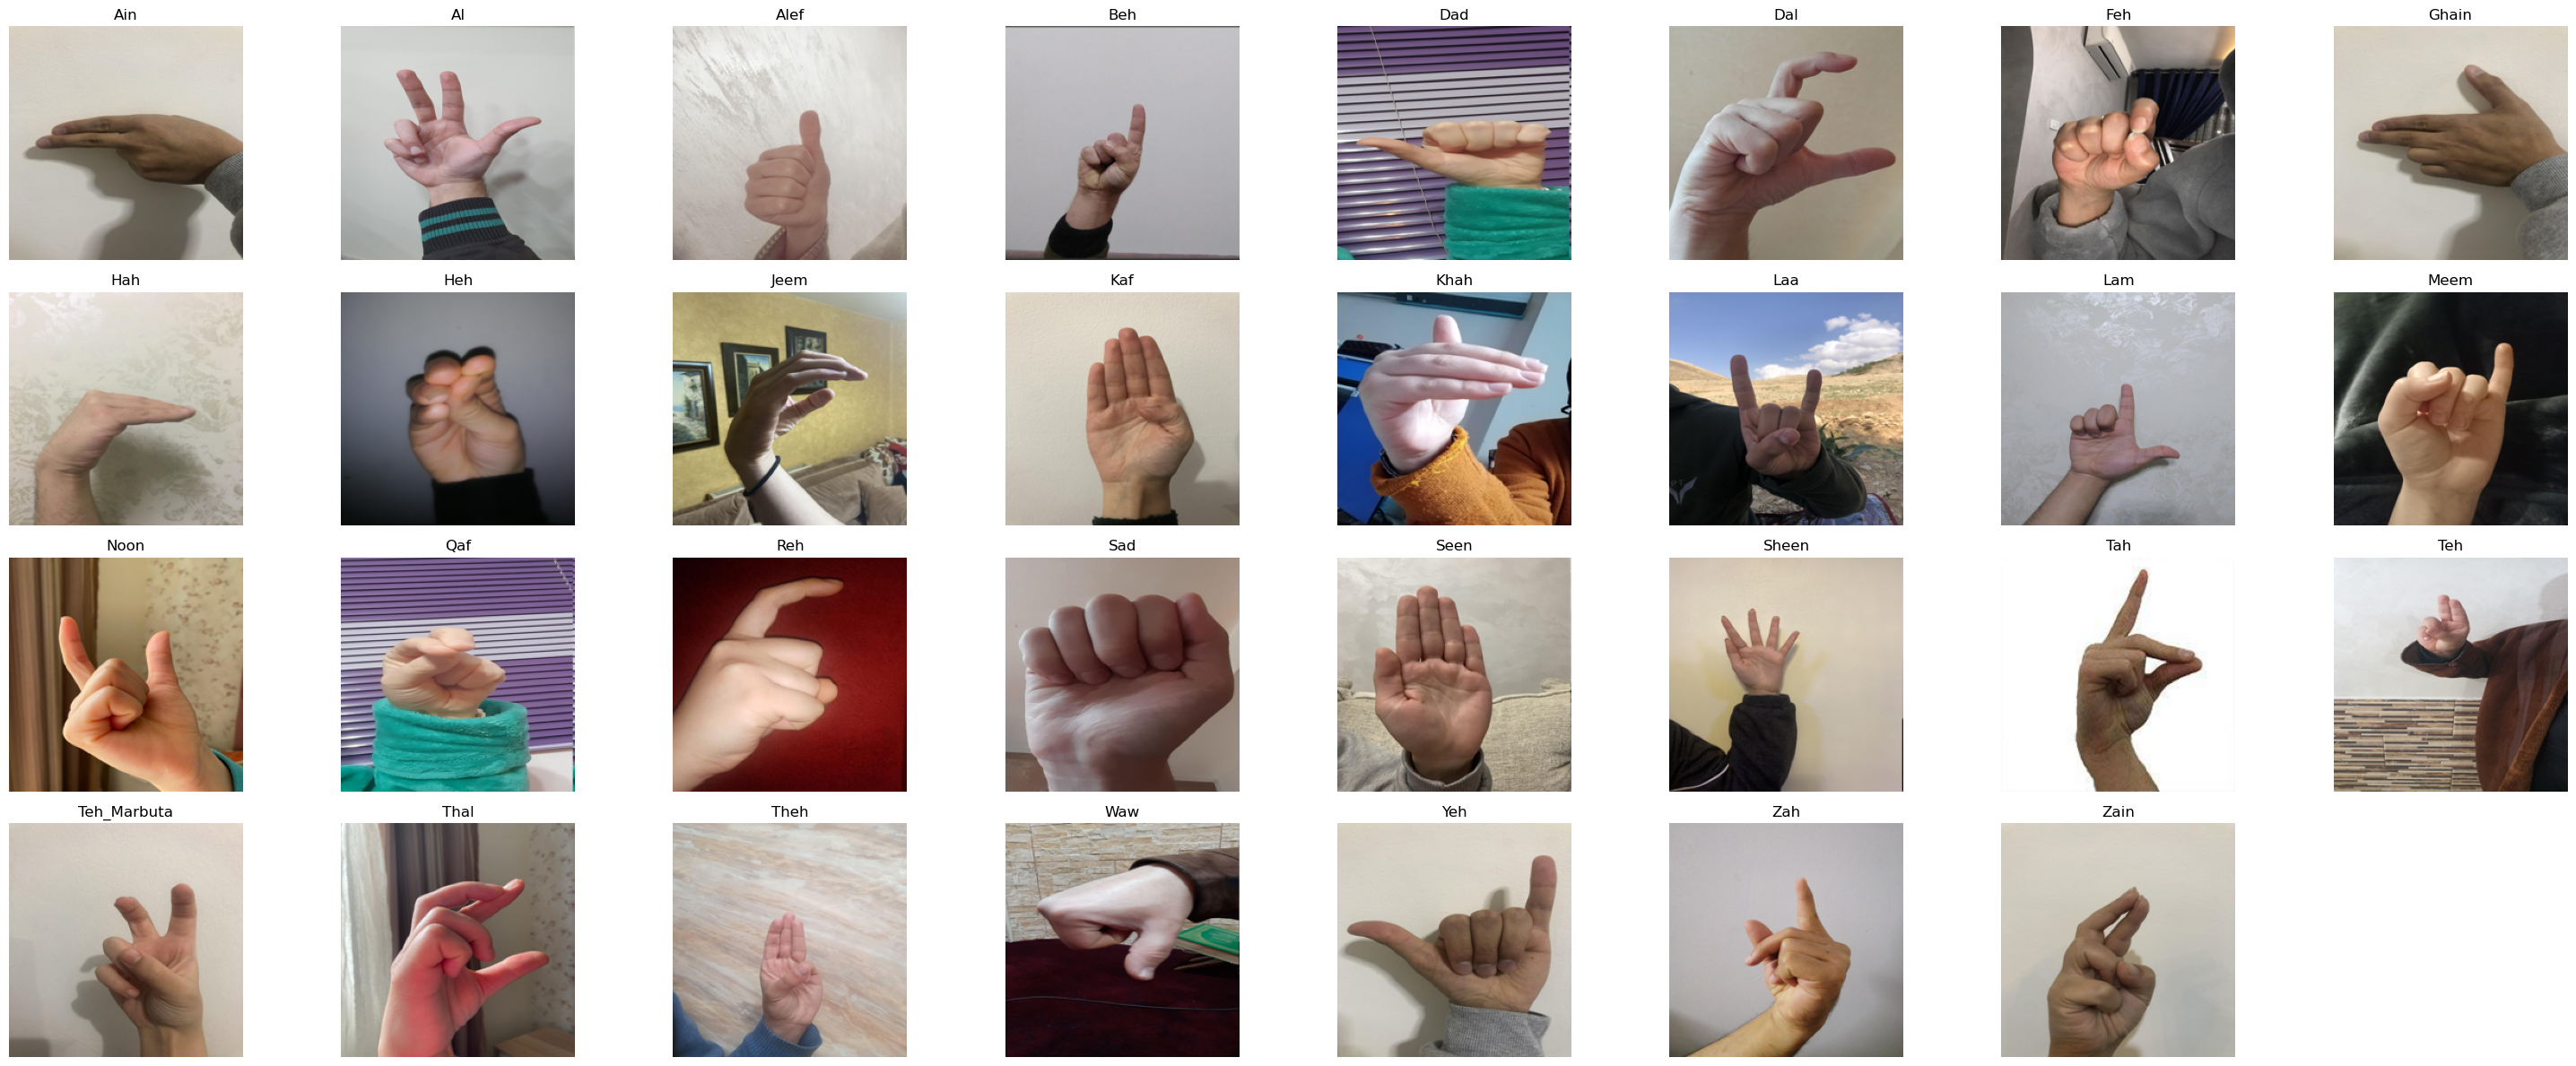

(7855, 224, 224, 3)
(7855,)


In [64]:
import matplotlib.pyplot as plt

# Get unique labels
unique_labels = np.unique(y)

# Create a dictionary to store an example image for each class
example_images = {}

for label in unique_labels:
    index = np.where(y == label)[0][0]
    example_images[label] = X[index]

# Display the example images
plt.figure(figsize=(30, 12))

for i, (label, image) in enumerate(example_images.items()):
    plt.subplot(4, 8, i+1) 
    plt.imshow(image)
    plt.title(f'{label}')
    plt.axis('off')

plt.tight_layout()
plt.show()
print(X.shape)
print(y.shape)

In [57]:
from keras.utils import to_categorical

#for index, value in enumerate(y):
 #   print(f'Index: {index}, Value: {value}')

label_mapping = {
    'Teh_Marbuta': 0,
    'Reh': 1,
    'Qaf': 2,
    'Jeem': 3,
    'Theh': 4,
    'Waw': 5,
    'Sad': 6,
    'Al':7,
    'Lam':8,
    'Ghain':9,
    'Ain':10,
    'Kaf':11,
    'Alef':12,
    'Teh':13,
    'Seen':14,
    'Feh':15,
    'Khah':16,
    'Zain':17,
    'Noon':18,
    'Beh':19,
    'Heh':20,
    'Dad':21,
    'Sheen':22,
    'Hah':23,
    'Laa':24,
    'Dal':25,
    'Meem':26,
    'Thal':27,
    'Yeh':28,
    'Zah':29,
    'Tah':30,    
}
y_int = [label_mapping[label_str] for label_str in y]
num_classes = 31  # Replace with the actual number of classes
y_encoded = to_categorical(y_int, num_classes=num_classes)

In [63]:
import tensorflow as tf
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Input,Flatten
from keras.optimizers import Adam

# Create the VGG16 model
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the VGG16 layers
for layer in vgg16.layers:
    layer.trainable = False

# Add a new classification layer
inputs = Input(shape=(224, 224, 3))
outputs = vgg16(inputs)
outputs = Flatten()(outputs) 
outputs = Dense(31, activation='softmax')(outputs)

model = Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

from keras.utils import to_categorical


label_mapping = {
    'Teh_Marbuta': 0,
    'Reh': 1,
    'Qaf': 2,
    'Jeem': 3,
    'Theh': 4,
    'Waw': 5,
    'Sad': 6,
    'Al':7,
    'Lam':8,
    'Ghain':9,
    'Ain':10,
    'Kaf':11,
    'Alef':12,
    'Teh':13,
    'Seen':14,
    'Feh':15,
    'Khah':16,
    'Zain':17,
    'Noon':18,
    'Beh':19,
    'Heh':20,
    'Dad':21,
    'Sheen':22,
    'Hah':23,
    'Laa':24,
    'Dal':25,
    'Meem':26,
    'Thal':27,
    'Yeh':28,
    'Zah':29,
    'Tah':30,    
}
y_int = [label_mapping[label_str] for label_str in y]
num_classes = len(label_mapping)
y_encoded = to_categorical(y_int, num_classes=num_classes)



# Train the model
model.fit(X, y_encoded, epochs=10, batch_size=32)

# Save the model
model.save('vgg16_model.h5')

Epoch 1/10
246/246 [==============================] - 640s 3s/step - loss: 9.3641 - accuracy: 0.3249
Epoch 2/10
246/246 [==============================] - 646s 3s/step - loss: 1.5416 - accuracy: 0.7691
Epoch 3/10
246/246 [==============================] - 642s 3s/step - loss: 0.3165 - accuracy: 0.9309
Epoch 4/10
246/246 [==============================] - 649s 3s/step - loss: 0.0800 - accuracy: 0.9799
Epoch 5/10
246/246 [==============================] - 641s 3s/step - loss: 0.0383 - accuracy: 0.9943
Epoch 6/10
246/246 [==============================] - 642s 3s/step - loss: 0.0325 - accuracy: 0.9972
Epoch 7/10
246/246 [==============================] - 648s 3s/step - loss: 0.0275 - accuracy: 0.9985
Epoch 8/10
246/246 [==============================] - 647s 3s/step - loss: 0.0251 - accuracy: 0.9982
Epoch 9/10
246/246 [==============================] - 647s 3s/step - loss: 0.0233 - accuracy: 0.9986
Epoch 10/10
246/246 [==============================] - 648s 3s/step - loss: 0.0256 - accura

/Users/albandariabdulaziz/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import statistics


k = 5
stratify = StratifiedKFold(n_splits=k, shuffle=True, random_state=24)

acc = []

for train_index , test_index in stratify.split(X,y_int):
    X_train = X[train_index]
    y_train = y_encoded[train_index]
    X_test = X[test_index]
    y_test = y_encoded[test_index]
    
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    
    # Freeze the VGG16 layers
    for layer in vgg16.layers:
        layer.trainable = False

    # Add a new classification layer
    inputs = Input(shape=(224, 224, 3))
    outputs = vgg16(inputs)
    outputs = Flatten()(outputs) 
    outputs = Dense(31, activation='softmax')(outputs)
    
    model = Model(inputs=inputs, outputs=outputs)
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=10, batch_size=32)
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_labels)
    acc.append(accuracy)

    #ypred = model.fit(X_train,y_train , epochs=10, batch_size=32)
    
    #accuracy = accuracy_score(y_train,ypred) 
    #acc.append(accuracy)


meanAc = statistics.mean(acc)
print("Mean Accuracy :",meanAc)


Epoch 1/10
197/197 [==============================] - 517s 3s/step - loss: 10.1119 - accuracy: 0.2849
Epoch 2/10
197/197 [==============================] - 543s 3s/step - loss: 1.6468 - accuracy: 0.7519
Epoch 3/10
197/197 [==============================] - 534s 3s/step - loss: 0.3201 - accuracy: 0.9279
Epoch 4/10
197/197 [==============================] - 544s 3s/step - loss: 0.0833 - accuracy: 0.9823
Epoch 5/10
197/197 [==============================] - 548s 3s/step - loss: 0.0348 - accuracy: 0.9963
Epoch 6/10
197/197 [==============================] - 546s 3s/step - loss: 0.0250 - accuracy: 0.9981
Epoch 7/10
138/197 [====================>.........] - ETA: 2:48 - loss: 0.0131 - accuracy: 0.9986